In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option("display.max_colwidth", -1)

In [2]:
#loading dataset
df=pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


All the columns here contain categorical variables.Since the label(class column) is categorical this requires classification approach

In [4]:
df.shape

(8124, 23)

The dataset has 8124 rows and 23 columns

In [5]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

All the columns contain object data

In [6]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

The dataset has no null values

In [7]:
#creating a table to vizualise no of unique classes in each column
var=[]
count=[]
cs=""
arr=[]
countstr=[]
for col in df:
    count.append(len([i for i in df[col].unique()]))
    var.append([i for i in df[col].unique()])
    arr.append([i for i in df[col].value_counts().values])
for i in var:
    cs=''
    for j in i:       
        cs+=' '+j
    countstr.append(cs)
    
col_uni=pd.DataFrame({'Column Name':df.columns,'No of Classes':count,'Class Names':countstr,'Class distribution':arr})
col_uni

,Column Name,No of Classes,Class Names,Class distribution
0,class,2,p e,"[4208, 3916]"
1,cap-shape,6,x b s f k c,"[3656, 3152, 828, 452, 32, 4]"
2,cap-surface,4,s y f g,"[3244, 2556, 2320, 4]"
3,cap-color,10,n y w g e p b u c r,"[2284, 1840, 1500, 1072, 1040, 168, 144, 44, 16, 16]"
4,bruises,2,t f,"[4748, 3376]"
5,odor,9,p a l n f c y s m,"[3528, 2160, 576, 576, 400, 400, 256, 192, 36]"
6,gill-attachment,2,f a,"[7914, 210]"
7,gill-spacing,2,c w,"[6812, 1312]"
8,gill-size,2,n b,"[5612, 2512]"
9,gill-color,12,k n g p w h u e b r y o,"[1728, 1492, 1202, 1048, 752, 732, 492, 408, 96, 86, 64, 24]"


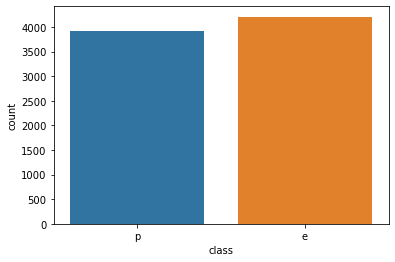

e    4208
p    3916
Name: class, dtype: int64


In [8]:
#checking the no of entries for each class in the label
sns.countplot(df['class'])
plt.show()
print(df['class'].value_counts())

we have 3916 poisonous and 4208 edible entries. The classes are evenly distributed 

In [9]:
#using label encoder to convert categorical variables to numerical values
le=LabelEncoder()
df2=pd.DataFrame()
for col in df:
    df2[col]=pd.Series(le.fit_transform(df[col]))
df2

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2


In [10]:
#choosing features and lables
X=df2.drop(['class'],axis=1)
y=df2['class']

In [11]:
#selecting best random state for train_test_split
maxacc=0
maxrs=0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Maximum Accuracy:',maxacc,'\nBest Random State:',maxrs)

Maximum Accuracy: 1.0 
Best Random State: 1


In [12]:
#using the best random state to split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [13]:
#models selected for this classification problem
rfc=RandomForestClassifier()
lr=LogisticRegression()
knc=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
bc=BaggingClassifier()
gbc=GradientBoostingClassifier()
svc=SVC()

In [14]:
#applying selected models to calculate accuracy, cross validation score and Difference between them
acc=[]
cv=[]
diff=[]
j=0
models=[rfc,lr,knc,dtc,bc,gbc,svc]
for i in models:
    i.fit(X_train,y_train)
    pred=i.predict(X_test)
    acc.append(accuracy_score(y_test,pred))
    cv.append(cross_val_score(i,X_train,y_train,cv=5).mean())
    diff.append(acc[j]-cv[j])
    j+=1
best_model=pd.DataFrame({'Model Name':[str(i).replace('(','').replace(')','') for i in models],
                     'Accuracy':acc,
                     'Cross Validation Score':cv,'Difference':diff})
best_model.sort_values(by='Cross Validation Score',ascending=False)

,Model Name,Accuracy,Cross Validation Score,Difference
0,RandomForestClassifier,1.000000,1.000000,0.000000
3,DecisionTreeClassifier,1.000000,1.000000,0.000000
4,BaggingClassifier,1.000000,1.000000,0.000000
5,GradientBoostingClassifier,1.000000,0.999816,0.000184
2,KNeighborsClassifier,0.997762,0.997244,0.000518
6,SVC,0.986572,0.986587,-0.000015
1,LogisticRegression,0.951884,0.948739,0.003145


The table shows that RandomForestClassifier, DecisionTreeClassifier, BaggingClassifier and
GradientBoostingClassifier gives the best accuracy(100%)

Out of which I am choosing Random Forest Classifier for further analysis.

Also since the achieved accuracy is 100% I am avoiding Parameter tuning

In [15]:
#Confusion Matrix
y_pred=rfc.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print('Metrics calculated for Random Forest Classifier:\n')
print('True Positive:',cm[0][0])
print('False Positive:',cm[0][1])
print('False Negative:',cm[1][0])
print('True Negative:',cm[1][1])
print('\nAccuracy:',accuracy_score(y_test,y_pred)*100,'%')

Metrics calculated for Random Forest Classifier:

True Positive: 1365
False Positive: 0
False Negative: 0
True Negative: 1316

Accuracy: 100.0 %


In [16]:
#saving the model
filename = 'Mushroom_Practice_Project'
pickle.dump(rfc, open(filename, 'wb'))